In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df['Years_old'] = 2021 - df.Year 

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


df['Car_Name']=df['Car_Name'].apply(lambda x:" ".join(x.split()[0:3]))

df = pd.get_dummies(df,drop_first=True)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [8]:
df.head().backfill()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Years_old      301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_results = ohe.fit_transform(df[["Car_Name"]])
pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_).head()

df = df.join(pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_))

In [10]:

df['Car_Name'] = df['Car_Name'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Seller_Type'] = df['Seller_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')

In [11]:
df['CarName'] = df['Car_Name'].cat.codes
df['FuelType'] = df['Fuel_Type'].cat.codes
df['SellerType'] = df['Seller_Type'].cat.codes
df['TransmissionType'] = df['Transmission'].cat.codes


In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old,CarName,FuelType,SellerType,TransmissionType
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,89,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,92,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,67,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,95,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,91,1,0,1


In [13]:
df=df.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'],axis=1)

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,CarName,FuelType,SellerType,TransmissionType
0,2014,3.35,5.59,27000,0,7,89,2,0,1
1,2013,4.75,9.54,43000,0,8,92,1,0,1
2,2017,7.25,9.85,6900,0,4,67,2,0,1
3,2011,2.85,4.15,5200,0,10,95,2,0,1
4,2014,4.60,6.87,42450,0,7,91,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              301 non-null    int64  
 1   Selling_Price     301 non-null    float64
 2   Present_Price     301 non-null    float64
 3   Kms_Driven        301 non-null    int64  
 4   Owner             301 non-null    int64  
 5   Years_old         301 non-null    int64  
 6   CarName           301 non-null    int8   
 7   FuelType          301 non-null    int8   
 8   SellerType        301 non-null    int8   
 9   TransmissionType  301 non-null    int8   
dtypes: float64(2), int64(4), int8(4)
memory usage: 15.4 KB


In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,CarName,FuelType,SellerType,TransmissionType
0,2014,3.35,5.59,27000,0,7,89,2,0,1
1,2013,4.75,9.54,43000,0,8,92,1,0,1
2,2017,7.25,9.85,6900,0,4,67,2,0,1
3,2011,2.85,4.15,5200,0,10,95,2,0,1
4,2014,4.60,6.87,42450,0,7,91,1,0,1


In [17]:
df['CarName'].unique()

array([89, 92, 67, 95, 91, 94, 90, 61, 75, 72, 62, 84, 64, 88, 80, 85, 70,
       76, 77, 79, 69, 78, 66, 87, 48, 55, 41, 10, 45, 42, 39, 47, 40, 43,
       16, 44, 46,  5,  3, 31, 59, 57, 50, 13, 36, 19,  6,  4, 56, 11, 14,
       51, 25, 15, 60, 30, 53, 37,  7, 27,  0, 24, 33, 58, 12,  1, 34, 21,
       38, 29, 52, 22, 26, 32,  8, 49, 54, 35, 20, 28,  9, 23, 18, 17,  2,
       83, 81, 82, 74, 96, 73, 71, 93, 68, 65, 63, 86], dtype=int8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              301 non-null    int64  
 1   Selling_Price     301 non-null    float64
 2   Present_Price     301 non-null    float64
 3   Kms_Driven        301 non-null    int64  
 4   Owner             301 non-null    int64  
 5   Years_old         301 non-null    int64  
 6   CarName           301 non-null    int8   
 7   FuelType          301 non-null    int8   
 8   SellerType        301 non-null    int8   
 9   TransmissionType  301 non-null    int8   
dtypes: float64(2), int64(4), int8(4)
memory usage: 15.4 KB


In [19]:
X = df.drop('Selling_Price', axis = 1)
y = df['Selling_Price']

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
model = ExtraTreesRegressor()

In [22]:
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
model.feature_importances_

array([4.53648840e-02, 3.96911134e-01, 2.53244359e-02, 1.22692995e-04,
       4.34883116e-02, 5.58104049e-02, 1.30672037e-01, 2.23124908e-01,
       7.91811922e-02])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
model.score(X_test,y_test)

0.9128355104371685

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [31]:
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [32]:
cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.91283551, 0.81443332, 0.83692293, 0.83378092, 0.85788584])

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [34]:
def Best_Model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [35]:
Best_Model(X, y)

C:\Users\MGJil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'mse'}, {'n_estimators': 140, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}]


,model,best_score,best_params
0,Linear_Regression,0.831766,{'normalize': False}
1,Decision_Tree,0.943418,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.942594,"{'n_estimators': 140, 'min_samples_split': 2, ..."


In [36]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')

In [37]:
final_dec_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=15, min_samples_leaf=2)

In [38]:
final_dec_model.score(X_test,y_test)

0.8992114801454486

In [39]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)

In [40]:
final_rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=120)

In [41]:
final_rf_model.score(X_test,y_test)

0.9593608273537894

In [42]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

array([0.9012166 , 0.93156399, 0.94552489, 0.75372866, 0.91014044])

In [43]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.96098982, 0.91456346, 0.97388848, 0.85945385, 0.96495116])

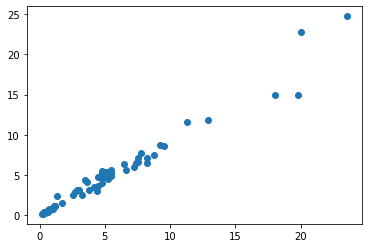

In [44]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

In [45]:
import pickle

In [46]:
with open('Final_Car_Name_Price_Predicting_Model.pkl', 'wb') as file:
    
    #dump information to that file
    pickle.dump(final_rf_model, file)

In [47]:
pickle.dump(df,open('df.pkl','wb'))

In [48]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,CarName,FuelType,SellerType,TransmissionType
0,2014,3.35,5.59,27000,0,7,89,2,0,1
1,2013,4.75,9.54,43000,0,8,92,1,0,1
2,2017,7.25,9.85,6900,0,4,67,2,0,1
3,2011,2.85,4.15,5200,0,10,95,2,0,1
4,2014,4.60,6.87,42450,0,7,91,1,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,5,68,1,0,1
297,2015,4.00,5.90,60000,0,6,65,2,0,1
298,2009,3.35,11.00,87934,0,12,68,2,0,1
299,2017,11.50,12.50,9000,0,4,68,1,0,1


In [49]:
X_train

,Year,Present_Price,Kms_Driven,Owner,Years_old,CarName,FuelType,SellerType,TransmissionType
74,2014,8.93,83000,0,7,76,1,0,1
239,2012,4.43,23709,0,9,74,2,0,1
64,2017,36.23,6000,0,4,80,1,0,0
294,2014,6.80,33019,0,7,63,2,0,1
286,2016,7.90,28569,0,5,86,2,0,1
...,...,...,...,...,...,...,...,...,...
251,2013,9.90,56701,0,8,68,2,0,1
192,2007,0.75,49000,1,14,23,2,1,1
117,2015,1.90,14000,0,6,48,2,1,1
47,2006,4.15,65000,0,15,95,2,0,1


In [50]:
final_rf_model.predict(pd.DataFrame([[2014,8.93,83000,0,7,76,1,0,1]],columns=['Year','Present_Price','Kms_Driven','Owner','Years_old','CarName','Fuel_Type','Seller_Type','Transmission']))

array([5.26625])